In [430]:
import os
import pandas as pd
import datetime

In [445]:
csv_list = []
appended = pd.DataFrame()
LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/nfs/processmining/minilogs/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/logs/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/table-precomp/logs/tch/'
for filename in os.listdir(LUIGI_LOG_PATH):
    if filename.endswith('.csv') and filename.startswith('catts'):
        log_path = LUIGI_LOG_PATH+'/'+filename
        csv_list.append(filename)
        print('Preprocessing... ',log_path)
        df = pd.read_csv(log_path, index_col=False)
        appended = appended.append(df)

#appended_df
csv_list.sort()
print(csv_list)
print(len(appended))
appended.head()

Preprocessing...  /usr/local/trustyou/home/andream/nfs/processmining/minilogs//catts_daily.2019-09-01_09-29-01.csv
['catts_daily.2019-09-01_09-29-01.csv']
1248


,case,activity,start_time,end_time
0,group.hotel.2019-10-05_05-41-02_01.mongo.csv,AllTasks,2019-09-01 09:29:23,2019-09-03 03:43:13
1,group.hotel.2019-10-05_05-41-02_01.mongo.csv,DumpTask,2019-09-01 09:42:15,2019-09-01 09:43:44
2,group.hotel.2019-10-05_05-41-02_01.mongo.csv,DumpTask,2019-09-01 09:42:15,2019-09-01 10:09:02
3,group.hotel.2019-10-05_05-41-02_01.mongo.csv,DumpTask,2019-09-01 09:42:15,2019-09-01 09:42:54
4,group.hotel.2019-10-05_05-41-02_01.mongo.csv,ProxySetupTask,2019-09-01 09:42:15,2019-09-01 09:54:13


In [446]:
#appended_df.to_datetime(start_time, format="%Y-%m-%d:%H:%M:%S").sort_values()
appended['start_time'] = pd.to_datetime(appended['start_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended['end_time'] = pd.to_datetime(appended['end_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended = appended.sort_values(by=['start_time'], ascending=True)
print(len(appended))
appended.head()
appended.tail()

1248


,case,activity,start_time,end_time
1243,group.hotel.2019-10-05_05-41-02_01.mongo.csv,UserDemographicsIncUpdateApplyTask,2019-09-03 02:17:59,2019-09-03 02:19:01
1244,group.hotel.2019-10-05_05-41-02_01.mongo.csv,ChunkTask,2019-09-03 03:09:50,2019-09-03 03:09:59
1245,group.hotel.2019-10-05_05-41-02_01.mongo.csv,UpdateDBTask,2019-09-03 03:11:40,2019-09-03 03:41:59
1246,group.hotel.2019-10-05_05-41-02_01.mongo.csv,ChunkTask,2019-09-03 03:41:59,2019-09-03 03:42:13
1247,group.hotel.2019-10-05_05-41-02_01.mongo.csv,RootTask,2019-09-03 03:42:13,2019-09-03 03:43:13


In [447]:
def get_duration(start_time, end_time):
    start = datetime.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S')
    duration = abs(end - start)
    return duration
#get_duration(ex['timestamp'][10],ex['timestamp'][1])

In [448]:
zero_points = appended[appended['activity']=='AllTasks']
zero_points['zero_point'] = zero_points['start_time']
zero_points = zero_points.drop(['activity', 'start_time', 'end_time'], axis=1)
zero_points.head()

/usr/local/trustyou/home/andream/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,case,zero_point
0,group.hotel.2019-10-05_05-41-02_01.mongo.csv,2019-09-01 09:29:23


In [449]:
#tt = pd.merge(start_df, end_df, on=['task_call', 'source_file'], how='outer')

appended = pd.merge(zero_points, appended, on = ['case'], how = 'inner') 
print(len(appended))
appended.head()

1248


,case,zero_point,activity,start_time,end_time
0,group.hotel.2019-10-05_05-41-02_01.mongo.csv,2019-09-01 09:29:23,AllTasks,2019-09-01 09:29:23,2019-09-03 03:43:13
1,group.hotel.2019-10-05_05-41-02_01.mongo.csv,2019-09-01 09:29:23,DumpTask,2019-09-01 09:42:15,2019-09-01 09:43:44
2,group.hotel.2019-10-05_05-41-02_01.mongo.csv,2019-09-01 09:29:23,DumpTask,2019-09-01 09:42:15,2019-09-01 10:09:02
3,group.hotel.2019-10-05_05-41-02_01.mongo.csv,2019-09-01 09:29:23,DumpTask,2019-09-01 09:42:15,2019-09-01 09:42:54
4,group.hotel.2019-10-05_05-41-02_01.mongo.csv,2019-09-01 09:29:23,ProxySetupTask,2019-09-01 09:42:15,2019-09-01 09:54:13


In [468]:
excluding = ['AllTasks', 'CrawlTask', 'ExtractTask']

exclusive = appended.copy()
exclusive['rel_start'] = exclusive.apply(lambda row: 
                                       str(get_duration(str(row['zero_point']),
                                                        str(row['start_time']))), axis=1)
exclusive['rel_end'] = exclusive.apply(lambda row: 
                                       str(get_duration(str(row['zero_point']),
                                                        str(row['end_time']))), axis=1)
#list(pd.to_timedelta(x, errors="coerce").dt.total_seconds())

exclusive['num_start']= list(pd.to_timedelta(exclusive['rel_start'], errors="coerce").dt.total_seconds ())
exclusive['num_end']= list(pd.to_timedelta(exclusive['rel_end'], errors="coerce").dt.total_seconds ())

#appended.apply(lambda row: row['rel_start'], axis=1)
#appended['num_end']= appended.apply(lambda row: (row['rel_end'].total_seconds())/60/60, axis=1)

exclusive = exclusive[['case', 'activity','rel_start', 'rel_end', 'num_start', 'num_end']]

exclusive = exclusive.sort_values(by=['num_start'], ascending=True)
exclusive = exclusive[~exclusive['activity'].isin(excluding)].reset_index()
#exclusive = exclusive.head(100)
print(len(exclusive))
exclusive.head()

241


,index,case,activity,rel_start,rel_end,num_start,num_end
0,1,group.hotel.2019-10-05_05-41-02_01.mongo.csv,DumpTask,0:12:52,0:14:21,772.0,861.0
1,2,group.hotel.2019-10-05_05-41-02_01.mongo.csv,DumpTask,0:12:52,0:39:39,772.0,2379.0
2,3,group.hotel.2019-10-05_05-41-02_01.mongo.csv,DumpTask,0:12:52,0:13:31,772.0,811.0
3,4,group.hotel.2019-10-05_05-41-02_01.mongo.csv,ProxySetupTask,0:12:52,0:24:50,772.0,1490.0
4,5,group.hotel.2019-10-05_05-41-02_01.mongo.csv,CrawlFeedTask,0:12:52,0:31:53,772.0,1913.0


In [479]:
snippet = exclusive.iloc[199:500 , :].reset_index()
print(len(snippet))
snippet.head()

42


,level_0,index,case,activity,rel_start,rel_end,num_start,num_end
0,199,1206,group.hotel.2019-10-05_05-41-02_01.mongo.csv,GeneratePIITask,"1 day, 12:57:26","1 day, 13:00:59",133046.0,133259.0
1,200,1207,group.hotel.2019-10-05_05-41-02_01.mongo.csv,StripPIITask,"1 day, 13:00:59","1 day, 13:01:36",133259.0,133296.0
2,201,1208,group.hotel.2019-10-05_05-41-02_01.mongo.csv,MergeNewData,"1 day, 13:01:36","1 day, 13:03:15",133296.0,133395.0
3,202,1209,group.hotel.2019-10-05_05-41-02_01.mongo.csv,FilterOutResponsesTask,"1 day, 13:03:15","1 day, 13:04:59",133395.0,133499.0
4,203,1210,group.hotel.2019-10-05_05-41-02_01.mongo.csv,UpdateReviewPropsTask,"1 day, 13:04:59","1 day, 13:34:43",133499.0,135283.0


In [483]:
counts = snippet.groupby(['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
counts = counts.sort_values(by=['counts'], ascending = False)
print(len(counts))
counts.head()

26


,activity,counts
2,ChunkTask,3
8,GroupTask,2
16,SemaTask,2
25,UserDemographicsIncUpdateCQLTask,2
23,UserDemographicsFullUpdateTask,2


In [484]:
#appended = appended.head(100)
#len(appended)
unique_act = snippet['activity'].unique().tolist()
print(len(unique_act))

26


In [485]:
def get_time_list_from_seconds(list):
    result = []
    for item in list:
        if item < 0: 
            result.append('')
        else: 
            result.append(datetime.timedelta(seconds=item))
    return result

def get_color_from_label(label, color):
    return color

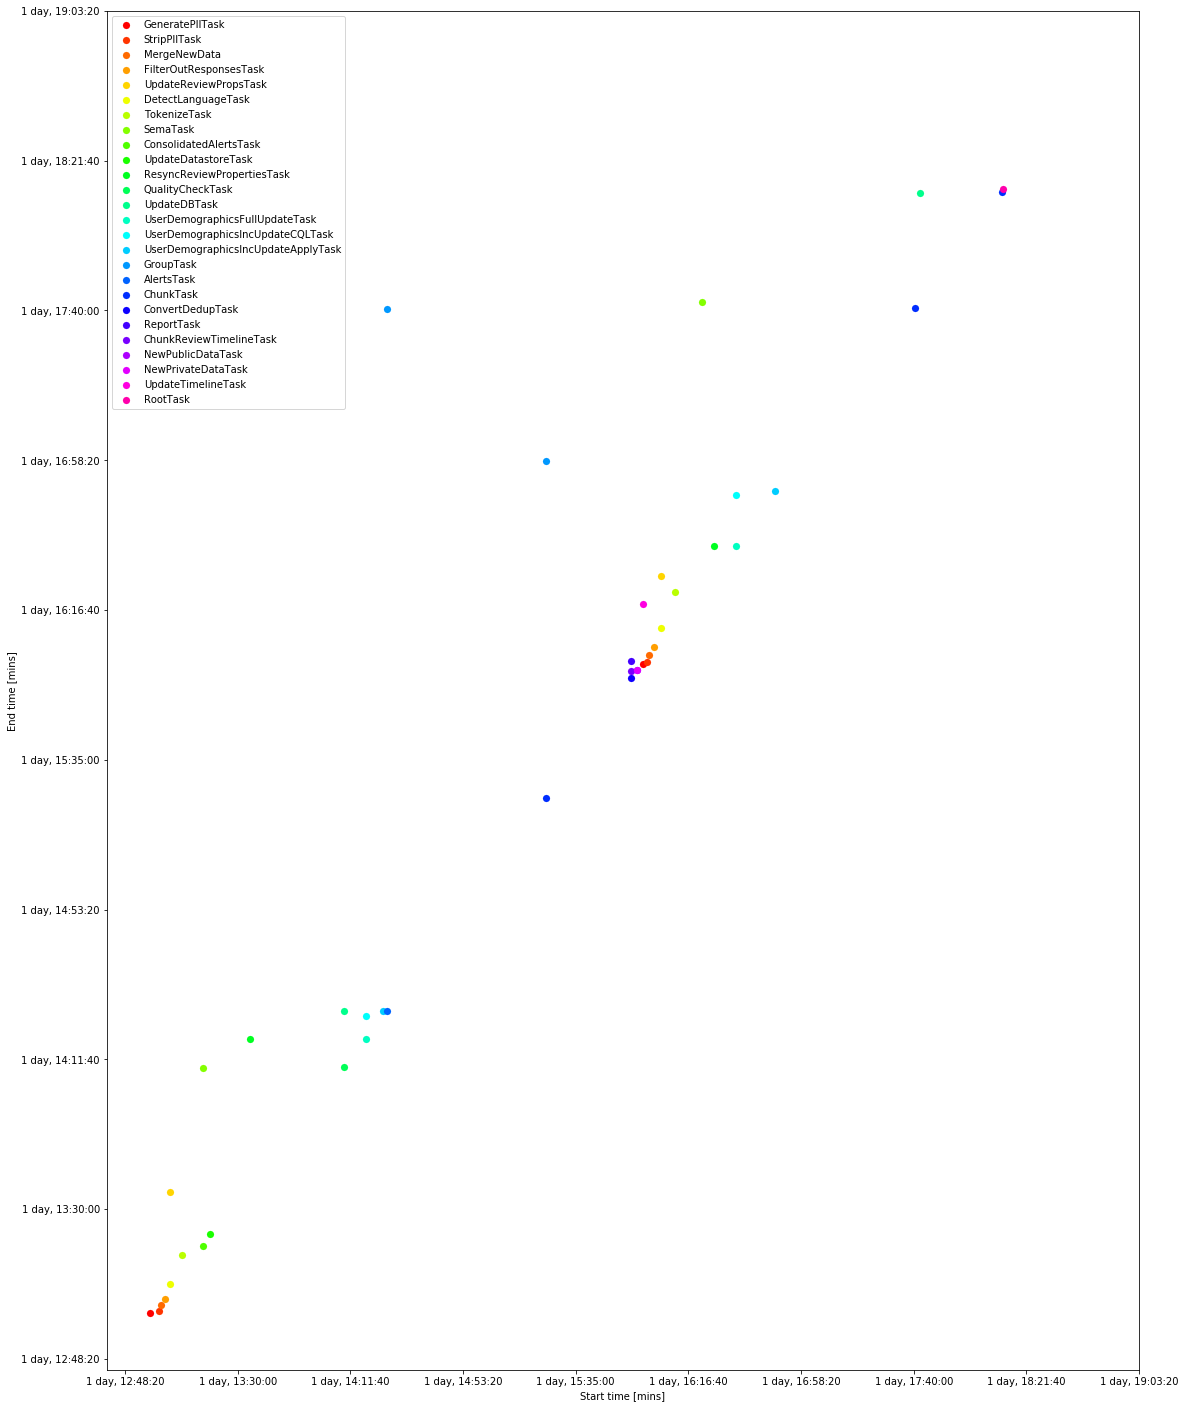

In [486]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 25)


#colormap = cm.nipy_spectral
#colormap = cm.gist_ncar
#colormap = cm.prism
#colormap = cm.tab20
colormap = cm.hsv
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(unique_act))]
legend = dict(zip(unique_act, colorlist))

for i, e in enumerate(snippet['num_start']):
    x = snippet['num_start'][i]
    y = snippet['num_end'][i]
    l = snippet['activity'][i]
    c = legend.get(l)

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)

ax.legend()
ax.set_xlabel('Start time [mins]')
ax.set_ylabel('End time [mins]')

xlocs, labels = plt.xticks()
ylocs, labels = plt.yticks()
plt.xticks(xlocs[1:], get_time_list_from_seconds(xlocs[1:])) 
plt.yticks(ylocs[1:], get_time_list_from_seconds(ylocs[1:])) 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

In [487]:
#TODO: Draw skyline
#TODO: Mean multiple events with same activity name
#TODO: Mean multiple traces